# Imports

In [1]:
from fastai import *
from fastai.vision import *

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
torch.cuda.is_available()

True

# Create Directories and Upload files

In [9]:
# Create 3 directories for each class
classes = ['black', 'teddy', 'grizzly']
for class_ in classes:
    if not os.path.exists(f'../data/bears/{class_}'):
        os.mkdir(f'../data/bears/{class_}')
!ls ../data/bears/

black	 teddy		      urls_grizzly_bear.txt
grizzly  urls_black_bear.txt  urls_teddy_bear.txt


In [11]:
Path.cwd()

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/imad_nbs')

In [12]:
path = Path('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/')
path

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears')

In [13]:
# Download images
fnames = list(path.glob('*.txt'))
fnames

[PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/urls_black_bear.txt'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/urls_teddy_bear.txt'),
 PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/urls_grizzly_bear.txt')]

In [18]:
pattern = re.compile(r'_(\w+)_')
for fname in fnames:
  class_ = pattern.search(fname.stem).group(1)
  download_images(path / fname.name, path / class_, max_pics=200)

Error https://www.washingtonpost.com/rf/image_1484w/2010-2019/WashingtonPost/2014/05/23/Interactivity/Images/Feeding_Bears-05501.jpg?t=20170517 HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://wildlife.state.nh.us/hunting/images/black-bear-duane-cross.jpg HTTPSConnectionPool(host='wildlife.state.nh.us', port=443): Read timed out. (read timeout=4)
Error http://stmedia.startribune.com/images/BEAR3.JPG HTTPConnectionPool(host='stmedia.startribune.com', port=80): Read timed out. (read timeout=4)


Error https://cordonbleushop.com/wp-content/uploads/2017/11/Oso.jpg HTTPSConnectionPool(host='cordonbleushop.com', port=443): Read timed out. (read timeout=4)
Error https://www.sendah.com/988-thickbox_default/daydream-white-teddy-bear.jpg HTTPSConnectionPool(host='www.sendah.com', port=443): Max retries exceeded with url: /988-thickbox_default/daydream-white-teddy-bear.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))


Error https://www.indianz.com/News/2017/06/30/yellowstonegrizzlycub.jpg HTTPSConnectionPool(host='www.indianz.com', port=443): Max retries exceeded with url: /News/2017/06/30/yellowstonegrizzlycub.jpg (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')",),))
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/news/morning-mix/wp-content/uploads/sites/21/2016/10/iStock_76959027_MEDIUM.jpg&w=480 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [20]:
for class_ in classes:
  n_images = len(os.listdir(path / f'{class_}'))
  print(f"{class_} : {n_images} images.")

black : 197 images.
teddy : 198 images.
grizzly : 198 images.


In [22]:
# Delete images that can't be opened
for class_ in classes:
    print(class_)
    verify_images(path / class_, delete=True, max_workers=4)

black


cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000092.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000084.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000042.png'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000013.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000113.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000011.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000184.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000154.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/black/00000075.jpg'
cannot identify image file '

cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddy/00000177.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddy/00000196.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddy/00000076.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddy/00000125.png'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddy/00000086.png'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddy/00000015.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/teddy/00000138.jpg'
grizzly


cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000082.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000069.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000133.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000129.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000094.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000139.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000167.jpg'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000187.png'
cannot identify image file '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears/grizzly/00000172.jpg'
cannot ide

In [23]:
for class_ in classes:
  n_images = len(os.listdir(path / f'{class_}'))
  print(f"{class_} : {n_images} images.")

black : 187 images.
teddy : 191 images.
grizzly : 187 images.


# EDA

In [42]:
# Always set the seed when validation set is chosen randomly
# So we can make sure that our results are reproducible
# Also, when we don't have training folder, use train="."
# Which means to look for current folder; otherwise it will
# look for a directory called train
np.random.seed(2)
data = (ImageItemList.from_folder(path)
       .random_split_by_pct(valid_pct=0.2)
       .label_from_folder()
       .transform(get_transforms(), size=224)
       .databunch())

In [43]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['teddy', 'grizzly', 'black'], 3, 451, 112)

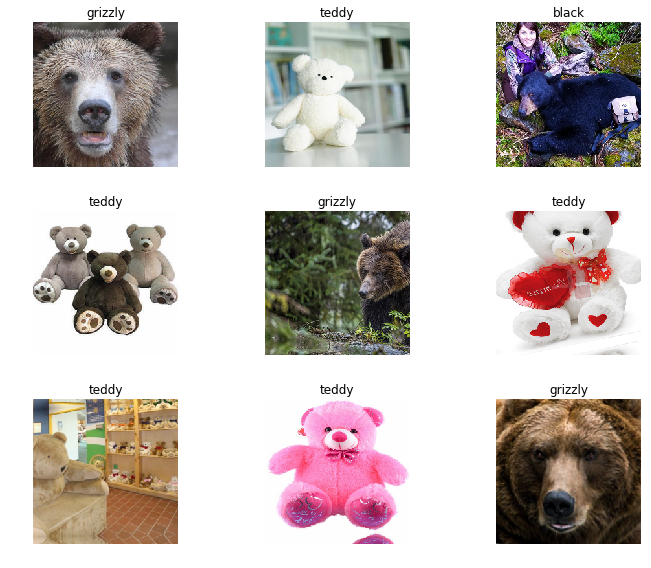

In [44]:
data.show_batch(rows=3, figsize=(10,8))

# Train model

In [45]:
# Create CNN using resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [46]:
learn.fit_one_cycle(4)

Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      0.708902    0.217230    0.062500    (00:15)
2      0.391765    0.129484    0.053571    (00:13)
3      0.333918    0.117727    0.035714    (00:14)
4      0.270854    0.115577    0.053571    (00:13)



In [47]:
learn.save('bears-resnet34-feature-extraction')

In [50]:
# Unfreeze the model to run lr_finder
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


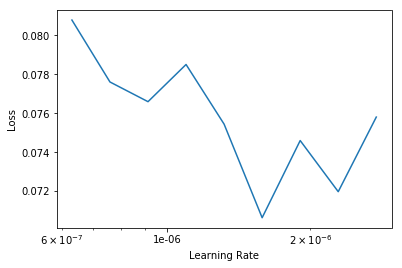

In [51]:
learn.recorder.plot()

In [52]:
# Fine tune the model
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-6))

Total time: 00:29
epoch  train_loss  valid_loss  error_rate
1      0.052703    0.109481    0.062500    (00:14)
2      0.077918    0.118684    0.053571    (00:14)



In [53]:
learn.save('bears-resnet34-fine-tuned')

# Interpretation

In [54]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.load('bears-resnet34-feature-extraction')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (451 items)
[Category teddy, Category teddy, Category teddy, Category teddy, Category teddy]...
Path: .
x: ImageItemList (451 items)
[Image (3, 300, 300), Image (3, 300, 300), Image (3, 1200, 1200), Image (3, 630, 1200), Image (3, 779, 604)]...
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears;
Valid: LabelList
y: CategoryList (112 items)
[Category grizzly, Category teddy, Category black, Category teddy, Category grizzly]...
Path: .
x: ImageItemList (112 items)
[Image (3, 348, 620), Image (3, 600, 600), Image (3, 512, 768), Image (3, 259, 255), Image (3, 453, 810)]...
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3,

In [55]:
# Create interpretation object
interp = ClassificationInterpretation.from_learner(learn)

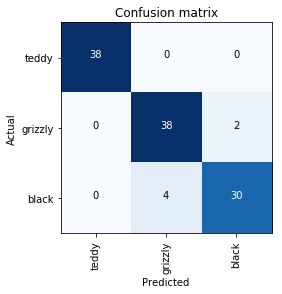

In [56]:
interp.plot_confusion_matrix()

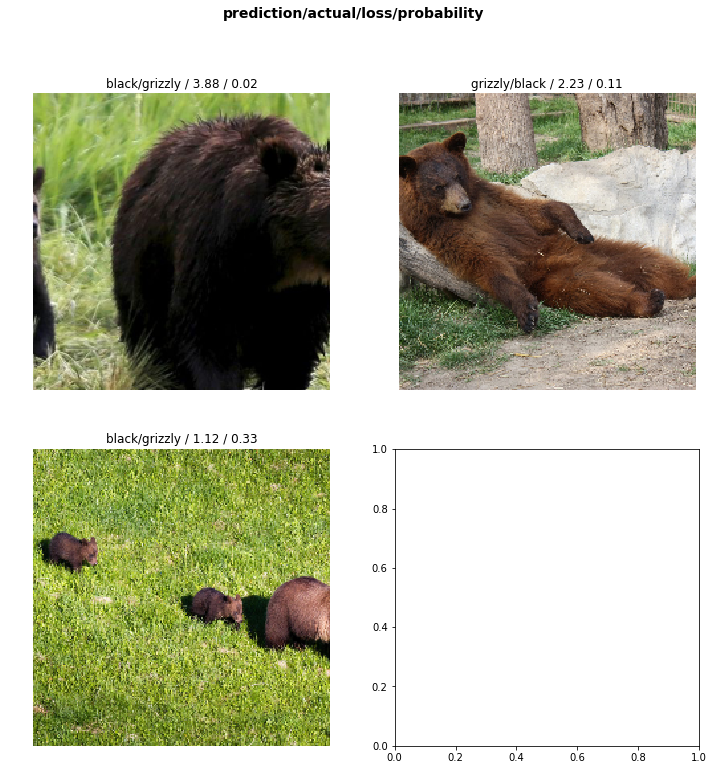

In [57]:
interp.plot_top_losses(3)

In [58]:
interp.most_confused(min_val=2)

[('black', 'grizzly', 4)]

Looks like the main confusion is between black and grizzly bears.

# Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [67]:
from fastai.widgets import ImageCleaner
# Get the top losses and their indices from validation sets
# Note that the losses are sorted
losses, idxs = interp.top_losses(k=5)

In [70]:
fd = ImageCleaner(data.valid_ds, idxs)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

# Putting model in production

In [71]:
defaults.device

device(type='cuda')

In [0]:
# fastai.defaults.device = torch.device('cpu')

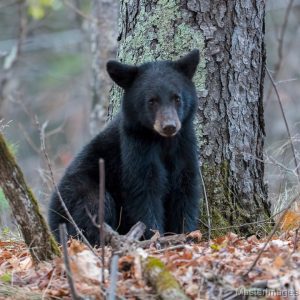

In [76]:
img = open_image(path / 'black' / '00000190.jpg')
img

In [79]:
path

PosixPath('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears')

In [80]:
# Use the same configuration as we did with training
classes = ['black', 'grizzly', 'teddy']

# This doesn't hold data. But it will make sure to pass
# The same configurations to images used during inference
data2 = ImageDataBunch.single_from_classes(path, classes,
                                           tfms=get_transforms(),
                                           size=224
                                          ).normalize(imagenet_stats)

In [91]:
learn = create_cnn(data, models.resnet34)
learn.load('bears-resnet34-fine-tuned')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (451 items)
[Category teddy, Category teddy, Category teddy, Category teddy, Category teddy]...
Path: .
x: ImageItemList (451 items)
[Image (3, 300, 300), Image (3, 300, 300), Image (3, 1200, 1200), Image (3, 630, 1200), Image (3, 779, 604)]...
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears;
Valid: LabelList
y: CategoryList (112 items)
[Category grizzly, Category teddy, Category black, Category teddy, Category grizzly]...
Path: .
x: ImageItemList (112 items)
[Image (3, 348, 620), Image (3, 600, 600), Image (3, 512, 768), Image (3, 259, 255), Image (3, 453, 810)]...
Path: /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/bears;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3,

In [92]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

'black'

In [93]:
pred_idx, outputs

(tensor(2), tensor([1.7790e-06, 6.2068e-06, 9.9999e-01]))